AIM 2: Performing t-Test

1. Load the diabetic_data dataset
2. Handle missing values, if any
3. For the variable 'num_med_proc', check if the data is normally distributed in each of the gender category
4. Calculate the total data points in each gender group
    4.1. If n < 30 and data is normal, perform t-Test.
    4.2. If n > 30 and data is not normal, perform Mann-Whitney U Test
        4.2.1. Try performing the regular t-test even if n > 30 and data is not normal. Do you see any difference in the result?
5. If the data is small and normally distributed, perform ANOVA on the above data. But if the data is large but not normally distributed, perform Kurskal-Wallis. 
    5.1. In either of the above cases, do you get similar result compared to Step 4?
6. Use the appropriate plot to visualize your data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv('./diabetic_data.csv')
print(df.isna().sum())

patient_nbr         0
race                0
gender              0
age                 0
weight              0
time_in_hospital    0
num_med_proc        0
number_diagnoses    0
insulin             0
dtype: int64


In [3]:
print(len(df['num_med_proc']))

99493


In [4]:
male_data = df['num_med_proc'][df['gender'] == 'Male']
female_data = df['num_med_proc'][df['gender'] == 'Female']

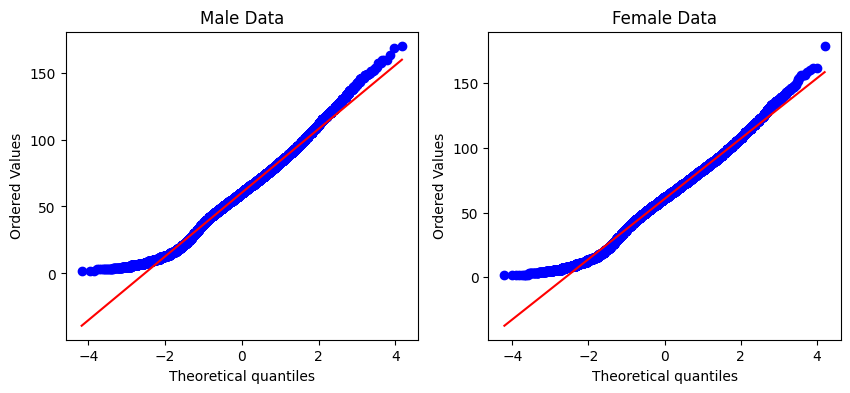

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plt.sca(axes[0])
stats.probplot(x=male_data, dist='norm', plot=plt)
plt.title('Male Data')

plt.sca(axes[1])
stats.probplot(x=female_data, dist='norm', plot=plt)
plt.title('Female Data')

plt.show()

In [6]:
male_anderson = stats.anderson(male_data)
female_anderson = stats.anderson(female_data)

is_male_normal = male_anderson.statistic < male_anderson.critical_values[2]
is_female_normal = female_anderson.statistic < female_anderson.critical_values[2]

In [7]:
print(
    f'male data: normal with statistics {male_anderson.statistic}' if is_male_normal
    else f'male data: not normal with statistics {male_anderson.statistic}')

male data: not normal with statistics 47.35650271131453


In [8]:
print(
    f'female data: normal with statistics {female_anderson.statistic}' if is_female_normal
    else f'female data: not normal with statistics {female_anderson.statistic}')

female data: not normal with statistics 60.28867645745777


In [10]:
n_male = len(male_data)
n_female = len(female_data)

In [11]:
if n_male < 30 and is_male_normal:
    t_test_result_male = stats.ttest_ind(male_data, female_data)
    print(f"t-Test result for male data (n < 30 and normal): {t_test_result_male}")
elif n_male > 30 and not is_male_normal:
    mann_whitney_result_male = stats.mannwhitneyu(male_data, female_data)
    print(f"Mann-Whitney U Test result for male data (n > 30 and not normal): {mann_whitney_result_male}")
    t_test_result_male = stats.ttest_ind(male_data, female_data)
    print(f"t-Test result for male data (n > 30 and not normal): {t_test_result_male}")

Mann-Whitney U Test result for male data (n > 30 and not normal): MannwhitneyuResult(statistic=np.float64(1211073937.0), pvalue=np.float64(2.7718524844703462e-05))
t-Test result for male data (n > 30 and not normal): TtestResult(statistic=np.float64(-1.8500485416691803), pvalue=np.float64(0.06430951669482379), df=np.float64(99490.0))


In [12]:
if n_female < 30 and is_female_normal:
    t_test_result_female = stats.ttest_ind(male_data, female_data)
    print(f"t-Test result for female data (n < 30 and normal): {t_test_result_female}")
elif n_female > 30 and not is_female_normal:
    mann_whitney_result_female = stats.mannwhitneyu(male_data, female_data)
    print(f"Mann-Whitney U Test result for female data (n > 30 and not normal): {mann_whitney_result_female}")
    t_test_result_female = stats.ttest_ind(male_data, female_data)
    print(f"t-Test result for female data (n > 30 and not normal): {t_test_result_female}")

Mann-Whitney U Test result for female data (n > 30 and not normal): MannwhitneyuResult(statistic=np.float64(1211073937.0), pvalue=np.float64(2.7718524844703462e-05))
t-Test result for female data (n > 30 and not normal): TtestResult(statistic=np.float64(-1.8500485416691803), pvalue=np.float64(0.06430951669482379), df=np.float64(99490.0))
